In [1]:
from api_functions import APIfunctions, Nomenclature
import os
import json
import numpy as np
from tqdm import tqdm

In [2]:
from matplotlib import pyplot as plt

In [3]:
# !pip install shapely

In [4]:
brainid=3

In [5]:
biosampleids=['141','222','142','213','244']
brainname={'141': 'FB40','222':'FB74','142':'FB34','213':'FB62','244':'FB85'}

In [6]:
biosampleid=biosampleids[brainid]

In [7]:
ls /data/keerthi/brainpubdata/141_new.csv

/data/keerthi/brainpubdata/141_new.csv


In [8]:
trsfiles = {
    '213':'/data/keerthi/brainpubdata/213_new_correction.csv',
    '142':'/data/keerthi/brainpubdata/142_new.csv',
    '244':'/data/keerthi/brainpubdata/244_new_b.csv',
    '222':'/data/keerthi/brainpubdata/222_new.csv',
    '141':'/data/keerthi/brainpubdata/141_new.csv',
}

In [9]:
localdir='/data/keerthi/brainpubdata/apidir'

In [10]:
os.makedirs(localdir,exist_ok=True)

In [11]:
apiobj = APIfunctions(biosampleid,trsfiles[biosampleid],localdir=localdir)

In [12]:
sectionlist=json.load(open('/data/keerthi/brainpubdata/seclist_%d.json' % brainid))

In [13]:
max(sectionlist,key= lambda x:int(x))

'2653'

In [14]:
annotatedsections=[int(x) for x in sectionlist if sectionlist[x]]

In [15]:
annotatedsections

[28,
 34,
 43,
 70,
 73,
 82,
 91,
 94,
 97,
 112,
 148,
 151,
 160,
 163,
 175,
 178,
 181,
 184,
 223,
 229,
 232,
 238,
 247,
 253,
 256,
 268,
 280,
 289,
 310,
 319,
 322,
 331,
 343,
 346,
 358,
 361,
 364,
 376,
 385,
 388,
 403,
 412,
 418,
 436,
 445,
 463,
 472,
 478,
 481,
 502,
 511,
 541,
 544,
 550,
 556,
 577,
 580,
 586,
 589,
 592,
 601,
 616,
 628,
 634,
 640,
 646,
 664,
 670,
 679,
 682,
 685,
 688,
 694,
 703,
 709,
 715,
 721,
 727,
 730,
 739,
 742,
 766,
 769,
 787,
 811,
 829,
 841,
 844,
 850,
 859,
 862,
 886,
 892,
 901,
 904,
 910,
 925,
 934,
 946,
 949,
 952,
 958,
 970,
 985,
 1039,
 1045,
 1048,
 1054,
 1057,
 1060,
 1063,
 1066,
 1072,
 1075,
 1078,
 1081,
 1084,
 1090,
 1093,
 1102,
 1123,
 1135,
 1141,
 1147,
 1156,
 1165,
 1168,
 1174,
 1183,
 1186,
 1189,
 1192,
 1195,
 1201,
 1204,
 1210,
 1213,
 1216,
 1219,
 1225,
 1228,
 1231,
 1240,
 1258,
 1261,
 1291,
 1312,
 1333,
 1336,
 1342,
 1345,
 1351,
 1360,
 1366,
 1369,
 1378,
 1381,
 1387,
 1420,


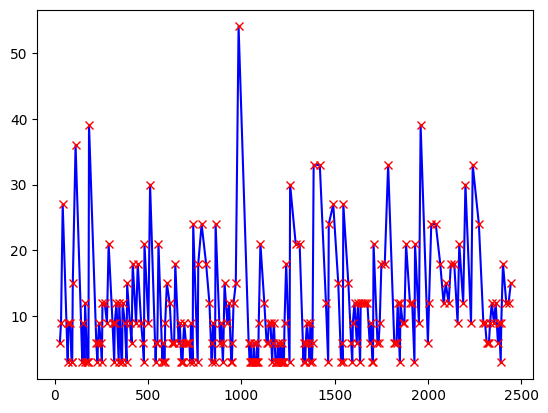

In [16]:
plt.plot(annotatedsections[:-1],np.diff(annotatedsections),'b-')
plt.plot(annotatedsections[:-1],np.diff(annotatedsections),'rx')

(array([67., 50., 41., 30.,  9., 12., 10.,  7.,  3.,  3.,  4.,  1.,  2.,
         0.,  0.,  0.,  0.,  1.,  0.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.,
        42., 45., 48., 51., 54., 57., 60.]),
 <BarContainer object of 19 artists>)

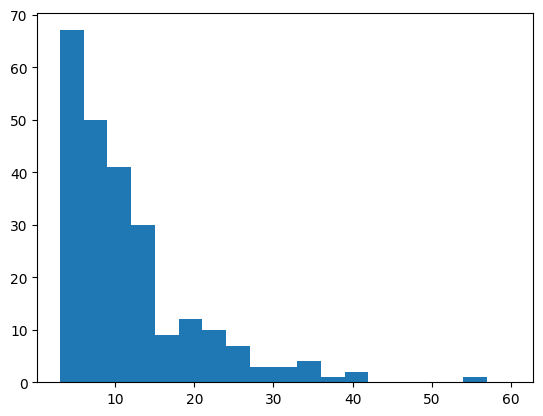

In [17]:
plt.hist(np.diff(annotatedsections),bins=range(3,63,3))

In [18]:
secno = annotatedsections[0]

In [20]:
msk_i=apiobj.get_mask_stack(str(secno),mpp=16)

In [21]:
np.unique(msk_i)

array([ 0, 13, 14, 15], dtype=uint16)

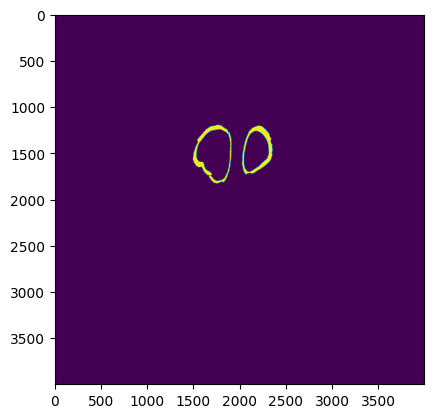

In [22]:
plt.imshow(msk_i==14)

In [23]:
nomobj = Nomenclature()

In [24]:
[(x,nomobj.onto_lookup[x]) for x in np.unique(msk_i) if x>0]

[(13, ('SGL-FCTx', 'Subpial granular layer, frontal cortex', 5, 12)),
 (14, ('MZ-FCTx', 'Marginal zone, frontal cortex', 5, 12)),
 (15, ('CP-FCTx', 'Cortical plate, frontal cortex', 5, 12))]

In [25]:
maxsec = max(annotatedsections)
nsl = round(int(maxsec)/3+0.5)

In [26]:
nsl

820

In [27]:
arr = np.zeros([nsl]+list(msk_i.shape),np.uint16)

In [28]:
arr.shape

(820, 4000, 4000)

In [29]:
res=16 # mpp

In [31]:
for secno in tqdm(annotatedsections):
    slno = secno//3
    arr[slno,...]=apiobj.get_mask_stack(str(secno),mpp=res)

 39%|█████████████████████████████████████▍                                                         | 95/241 [09:48<22:26,  9.23s/it]

Skipping feature 16379: invalid polygon coordinates
Skipping feature 16219: invalid polygon coordinates


 48%|████████████████████████████████████████████▊                                                 | 115/241 [12:57<21:12, 10.10s/it]

Skipping feature 255757: invalid polygon coordinates


 51%|████████████████████████████████████████████████▎                                             | 124/241 [14:22<18:49,  9.65s/it]

Skipping feature 13731: invalid polygon coordinates
Skipping feature 14563: invalid polygon coordinates


 53%|█████████████████████████████████████████████████▌                                            | 127/241 [14:54<19:40, 10.35s/it]

Skipping feature 36895: invalid polygon coordinates


 63%|███████████████████████████████████████████████████████████▋                                  | 153/241 [19:37<17:21, 11.83s/it]

Skipping feature 26720: invalid polygon coordinates


 70%|█████████████████████████████████████████████████████████████████▌                            | 168/241 [22:41<16:38, 13.68s/it]

Skipping feature 116332: invalid polygon coordinates
Skipping feature 116369: invalid polygon coordinates


 73%|████████████████████████████████████████████████████████████████████▎                         | 175/241 [24:16<13:49, 12.56s/it]

Skipping feature 26807: invalid polygon coordinates
Skipping feature 14952: invalid polygon coordinates


 74%|█████████████████████████████████████████████████████████████████████▊                        | 179/241 [25:00<11:43, 11.34s/it]

Skipping feature 9837: invalid polygon coordinates


 77%|████████████████████████████████████████████████████████████████████████▏                     | 185/241 [26:05<10:16, 11.00s/it]

Skipping feature 17449: invalid polygon coordinates
Skipping feature 9332: invalid polygon coordinates


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 188/241 [26:48<11:35, 13.12s/it]

Skipping feature 38310: invalid polygon coordinates
Skipping feature 9625: invalid polygon coordinates


 79%|██████████████████████████████████████████████████████████████████████████▍                   | 191/241 [27:25<10:45, 12.91s/it]

Skipping feature 19007: invalid polygon coordinates
Skipping feature 33880: invalid polygon coordinates


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [34:17<00:00,  8.54s/it]


In [32]:
secno

2458

In [33]:
secno//3

819

In [1]:
import SimpleITK as sitk

In [35]:
img=sitk.GetImageFromArray(arr)

img.SetSpacing([res/1000,res/1000,0.060])

drnmat=np.array([ [0,0,1], [-1,0,0], [0,-1,0] ]) # psr 

# sagittal LR
# rotmat = np.array([[-1,0,0],[0,-1,0],[0,0,1]]) # psr to asl

# sagittal RL
rotmat = np.eye(3) 

# coronal AP
if biosampleid=='213':
    rotmat = np.array([[0,-1,0],[1,0,0],[0,0,1]]) # psr to rsa

drn = np.dot(rotmat,drnmat).ravel()

img.SetDirection(drn.tolist())



In [36]:
arr.dtype

dtype('uint16')

In [37]:
img.GetPixelIDTypeAsString()

'16-bit unsigned integer'

In [38]:
sitk.WriteImage(img, '/data/keerthi/brainpubdata/%s/%s_annot_%dmpp.nii.gz' % (biosampleid,brainname[biosampleid],res), useCompression=True)

In [39]:
del arr, img

# reverse

In [16]:
import SimpleITK as sitk

In [17]:
img = sitk.ReadImage('/data/keerthi/brainpubdata/213/FB62_annot_16mpp.nii.gz')

In [18]:
arr = sitk.GetArrayViewFromImage(img)

In [4]:
arr.shape

(820, 4000, 4000)

In [20]:
slices = [x//3 for x in annotatedsections]

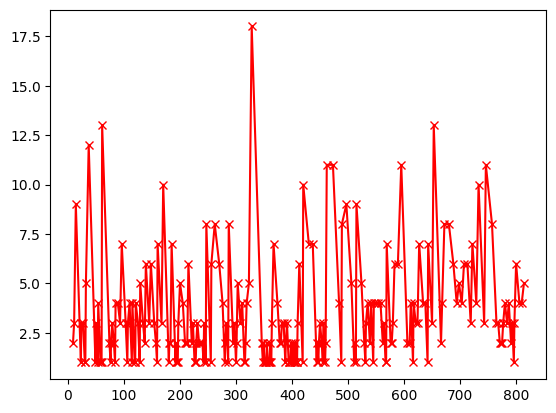

In [21]:
plt.plot(slices[:-1],np.diff(slices),'r-x')

(array([67., 50., 41., 39.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

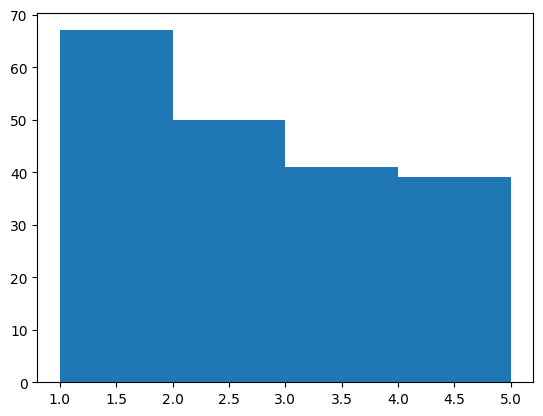

In [22]:
plt.hist(np.diff(slices),bins=[1,2,3,4,5])

In [23]:
slices_arr=np.array(slices)

In [24]:
loc = np.diff(slices_arr)>5

In [25]:
len(loc)

240

In [26]:
np.diff(slices_arr)[:2]

array([2, 3])

In [27]:
slices_arr[:3]

array([ 9, 11, 14])

In [28]:
np.vstack([slices_arr[:-1], np.diff(slices_arr)-1]).T

array([[  9,   1],
       [ 11,   2],
       [ 14,   8],
       [ 23,   0],
       [ 24,   2],
       [ 27,   2],
       [ 30,   0],
       [ 31,   0],
       [ 32,   4],
       [ 37,  11],
       [ 49,   0],
       [ 50,   2],
       [ 53,   0],
       [ 54,   3],
       [ 58,   0],
       [ 59,   0],
       [ 60,   0],
       [ 61,  12],
       [ 74,   1],
       [ 76,   0],
       [ 77,   1],
       [ 79,   2],
       [ 82,   1],
       [ 84,   0],
       [ 85,   3],
       [ 89,   3],
       [ 93,   2],
       [ 96,   6],
       [103,   2],
       [106,   0],
       [107,   2],
       [110,   3],
       [114,   0],
       [115,   3],
       [119,   0],
       [120,   0],
       [121,   3],
       [125,   2],
       [128,   0],
       [129,   4],
       [134,   2],
       [137,   1],
       [139,   5],
       [145,   2],
       [148,   5],
       [154,   2],
       [157,   1],
       [159,   0],
       [160,   6],
       [167,   2],
       [170,   9],
       [180,   0],
       [181,

In [29]:
spacing=4
for dx in range(spacing):
    cnt = 0
    clist = [] # copy list
    ilist = [] # interp list
    matched = []
    
    pl = range(slices[0]+dx,slices[-1]+1,spacing)
    for planned in pl:
        if planned in slices: 
            clist.append((planned,planned))
            matched.append(planned)
            cnt+=1
        elif planned+1 in slices:
            clist.append((planned,planned+1))
            matched.append(planned+1)
            cnt+=1
        elif planned-1 in slices:
            clist.append((planned,planned-1))
            matched.append(planned-1)
            cnt+=1
        else:
            imin = np.argmin(np.abs(slices_arr-planned))
            vmin = slices_arr[imin]
            if planned<vmin:
                vlower = slices_arr[imin-1]
                vupper = slices_arr[imin]
            else:
                vlower = vmin
                vupper = slices_arr[imin+1]
                
            if planned-vlower < spacing and vlower not in matched:
                clist.append((planned,vlower))
                matched.append(vlower)
                cnt+=1
            elif vupper-planned < spacing and vupper not in matched:
                clist.append((planned,vupper))
                matched.append(vupper)
                cnt+=1
            else:
                ilist.append((planned,vlower,vupper))
                
    print(dx,cnt, cnt/len(pl),len(ilist),ilist)
    break
    

0 176 0.8669950738916257 27 [(17, 14, 23), (41, 37, 49), (45, 37, 49), (65, 61, 74), (69, 61, 74), (173, 170, 180), (265, 262, 270), (333, 328, 346), (337, 328, 346), (341, 328, 346), (425, 420, 430), (433, 430, 437), (465, 462, 473), (469, 462, 473), (477, 473, 484), (493, 489, 497), (501, 497, 506), (597, 595, 606), (601, 595, 606), (657, 653, 666), (661, 653, 666), (709, 707, 713), (725, 722, 729), (737, 733, 743), (749, 746, 757), (753, 746, 757), (761, 757, 765)]


In [30]:
len(clist)

176

In [31]:
clist = np.array(clist)
newsl = clist[:,0]//spacing

In [37]:
clist.shape

(176, 2)

In [32]:
# np.array(pl)

In [33]:
newsl.shape

(176,)

In [34]:
np.hstack([newsl[...,np.newaxis],clist])

array([[  2,   9,   9],
       [  3,  13,  14],
       [  5,  21,  23],
       [  6,  25,  24],
       [  7,  29,  30],
       [  8,  33,  32],
       [  9,  37,  37],
       [ 12,  49,  49],
       [ 13,  53,  53],
       [ 14,  57,  58],
       [ 15,  61,  61],
       [ 18,  73,  74],
       [ 19,  77,  77],
       [ 20,  81,  82],
       [ 21,  85,  85],
       [ 22,  89,  89],
       [ 23,  93,  93],
       [ 24,  97,  96],
       [ 25, 101, 103],
       [ 26, 105, 106],
       [ 27, 109, 110],
       [ 28, 113, 114],
       [ 29, 117, 115],
       [ 30, 121, 121],
       [ 31, 125, 125],
       [ 32, 129, 129],
       [ 33, 133, 134],
       [ 34, 137, 137],
       [ 35, 141, 139],
       [ 36, 145, 145],
       [ 37, 149, 148],
       [ 38, 153, 154],
       [ 39, 157, 157],
       [ 40, 161, 160],
       [ 41, 165, 167],
       [ 42, 169, 170],
       [ 44, 177, 180],
       [ 45, 181, 181],
       [ 46, 185, 185],
       [ 47, 189, 192],
       [ 48, 193, 193],
       [ 49, 197

In [41]:
pl[-1]

817

In [42]:
newarr = np.zeros((pl[-1]//spacing+1,4000,4000),np.uint16)

In [43]:
for ii,newslno in enumerate(newsl):
    slno = clist[ii,1]
    newarr[newslno,...]=arr[slno,...]

In [45]:
img=sitk.GetImageFromArray(newarr)
res=16
img.SetSpacing([res/1000,res/1000,0.060*spacing])
img.SetOrigin([0,0,0.06*spacing/2])

drnmat=np.array([ [0,0,1], [-1,0,0], [0,-1,0] ]) # psr 

# sagittal LR
# rotmat = np.array([[-1,0,0],[0,-1,0],[0,0,1]]) # psr to asl

# sagittal RL
rotmat = np.eye(3) 

# coronal AP
if biosampleid=='213':
    rotmat = np.array([[0,-1,0],[1,0,0],[0,0,1]]) # psr to rsa

drn = np.dot(rotmat,drnmat).ravel()

img.SetDirection(drn.tolist())


In [46]:
sitk.WriteImage(img, '/data/keerthi/brainpubdata/%s/%s_annot%d_%dmpp.nii.gz' % (biosampleid,brainname[biosampleid],spacing,res), useCompression=True)

In [34]:
len(pl)

163

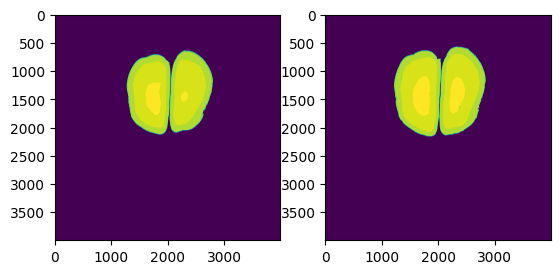

In [35]:
plt.subplot(1,2,1)
plt.imshow(arr[61])

plt.subplot(1,2,2)
plt.imshow(arr[74])

In [36]:
np.unique(arr[61])

array([ 0, 13, 14, 15, 16, 17], dtype=uint16)

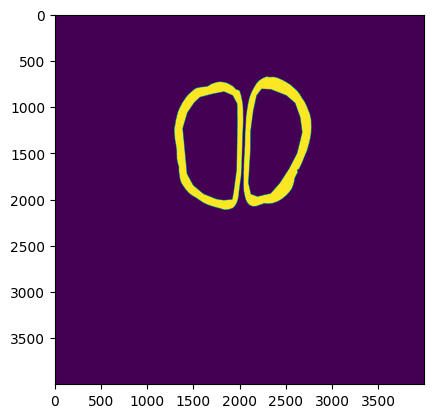

In [19]:
plt.imshow(arr[61]==15)

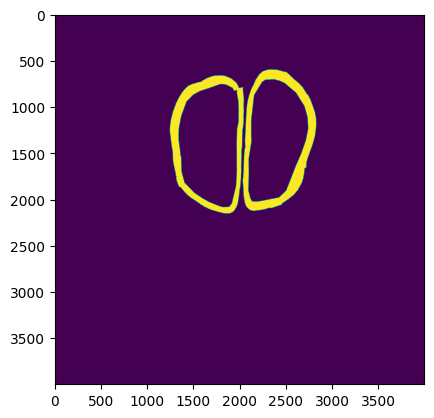

In [20]:
plt.imshow(arr[74]==15)

In [38]:
# import cv2
# import shapely

# def make_polyshape(feat):
    
#     if len(feat)>1:
#         return shapely.Polygon(shell=feat[0],holes=feat[1:])
#     else:
#         # print(feat)
#         pass
#     return shapely.Polygon(feat[0])

# def mask_to_shapes(msk):
#     contours,hier=cv2.findContours( msk.astype(np.uint8),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
#     features, _ = get_features(contours, hier)

#     shapes = []
#     for feat in features:
#         try:
#             shapes.append(make_polyshape(feat))
#         except Exception as ex:
#             print('make polyshape error',ex)
#     return shapes
    
# def labelmap_to_shapes(lmap):
#     shapes = {}
#     for clr in np.unique(lmap):
#         if clr==0:
#             continue
    
#         shapes[clr] = mask_to_shapes(lmap==clr)
#     return shapes

# def get_features(contours, hier):
#     polygons = []
#     features = []
#     outer = np.where(hier[0,:,3]==-1)[0]
#     for outerid in outer:
#         feat = [contours[outerid].squeeze()]
#         innerids = []
#         for innerid in np.where(hier[0,:,3]==outerid)[0]:
#             innerids.append(innerid)
#             feat.append(contours[innerid].squeeze())
            
#         polygons.append({'outer':outerid,'inner':innerids})
#         features.append(feat)
#     return features, polygons

In [261]:
from contour_functions import  nearest_shape , labelmap_to_shapes, make_polyshape

In [25]:
shapes_61 = labelmap_to_shapes(arr[61])
shapes_74 = labelmap_to_shapes(arr[74])

make polyshape error linearrings: Input operand 0 does not have enough dimensions (has 1, gufunc core with signature (i, d)->() requires 2)
make polyshape error linearrings: Input operand 0 does not have enough dimensions (has 1, gufunc core with signature (i, d)->() requires 2)


In [41]:
len(shapes_61)

5

In [42]:
len(shapes_74)

5

In [43]:
shapes_61.keys()

dict_keys([13, 14, 15, 16, 17])

In [44]:
[len(shapes_61[x]) for x in shapes_61]

[11, 2, 2, 2, 2]

In [27]:
nr,_ = nearest_shape(shapes_61[15][0], shapes_74[15])

In [356]:
def boundarymask(contour):
    msk = np.zeros([4000,4000],bool)
    r = contour[:,1]
    c = contour[:,0]
    rr,cc = skdraw.polygon_perimeter(r,c,msk.shape,clip=True)
    msk[rr,cc]=1
    return msk
    
def morph_contour(fromcontour, tocontour, fromnum, tonum, internum):
    
    # frommsk = boundarymask(fromcontour)
    
    tomsk = boundarymask(tocontour)
    # plt.subplot(1,3,1)
    # plt.imshow(frommsk)
    # plt.subplot(1,3,2)
    # plt.imshow(tomsk)
    
    assert tonum > fromnum
    assert internum > fromnum and internum < tonum
    
    nsteps = tonum-fromnum+1
    stepnum = internum-fromnum
    
    distmap,distidx = scipy.ndimage.distance_transform_edt(~tomsk,return_indices=True)
    # plt.subplot(1,3,3)
    # plt.imshow(distmap)
    
    pairs = []
    widthlist = []
    newpts = []
    
    for pt in fromcontour:
        pairpt = distidx[:,pt[1],pt[0]].T.squeeze()[::-1].tolist() # maintain x,y notation
        pairs.append((pt,pairpt))
        u = np.array(pairpt-pt)
        m = scipy.linalg.norm(u)
        widthlist.append(m)
        if m==0:
            newpts.append(pt)
        else:
            u = u/m
            newpt = np.array(pt) + u*m/nsteps*stepnum
            newpts.append(newpt)

    return np.array(newpts), pairs, widthlist
    
    
                        
def morph_shape(fromshape, toshape, fromnum, tonum, internum):
    
    extfrom=np.array(fromshape.exterior.xy).T.astype(int)
    extto=np.array(toshape.exterior.xy).T.astype(int)

    newext,pairs,widthlist = morph_contour(extfrom, extto, fromnum, tonum, internum)
    # print(pairs)
    # print(widthlist)
    intfrom = np.vstack([np.array(elt.xy).T.astype(int) for elt in fromshape.interiors])
    intto = np.vstack([np.array(elt.xy).T.astype(int) for elt in toshape.interiors])

    # print(len(intfrom), len(intto))
    newint, pairs2, widthlist2 = morph_contour(intfrom, intto, fromnum, tonum, internum)
    
    return make_polyshape([newext, newint])
    

    
    

In [357]:
shp1=shapes_61[15][0]

In [358]:
newshp = morph_shape(shp1,nr,61,74,65)

In [359]:
import shapely

In [360]:
type(shp1.exterior)

shapely.geometry.polygon.LinearRing

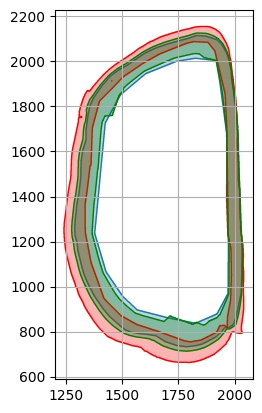

In [361]:
from shapely import plotting as shpplot
# plt.subplot(1,2,1)
shpplot.plot_polygon(shp1,add_points=False)
shpplot.plot_polygon(nr,add_points=False,color='r')

# plt.subplot(1,2,2)
shpplot.plot_polygon(newshp,add_points=False, color='g')

In [29]:
from skimage import draw as skdraw

In [257]:
shapes_61[15][0].interiors[0].coords[0]

(1824.0, 838.0)

In [47]:
xy61=np.array(shapes_61[15][0].exterior.xy).T.astype(int)
xy74=np.array(nr.exterior.xy).T.astype(int)

In [48]:

msk61=skdraw.polygon2mask([4000,4000], np.fliplr(xy61))>0
msk74=skdraw.polygon2mask([4000,4000], np.fliplr(xy74))>0

In [161]:
combined = np.ones((4000,4000), dtype=float)*3
combined[msk74]=1
combined[msk61]=2

In [188]:
inters = msk74&~msk61

In [211]:
distmap,distidx = scipy.ndimage.distance_transform_edt(msk74,return_indices=True)

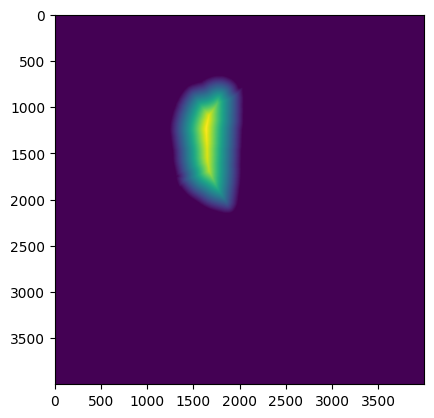

In [212]:
plt.imshow(distmap)

In [239]:
pair_from_61 = []
widthlist = []
newpts = []
for pt in xy61:
    pairpt = distidx[:,pt[1],pt[0]].T.squeeze()[::-1].tolist()
    pair_from_61.append((pt,pairpt))
    u = np.array(pairpt-pt)
    m = scipy.linalg.norm(u)
    widthlist.append(m)
    if m==0:
        newpts.append(pt)
    else:
        u = u/m
        newpt = np.array(pt) + u*m/13*3
        newpts.append(newpt)
    

In [246]:
newpts = np.array(newpts)

In [247]:
newpts.shape

(3361, 2)

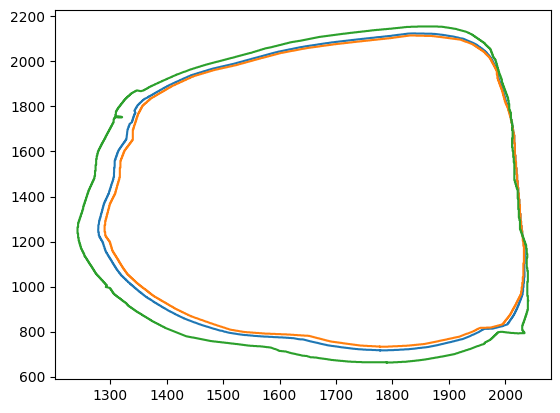

In [250]:
plt.plot(newpts[:,0],newpts[:,1],'-')
plt.plot(xy61[:,0],xy61[:,1])
plt.plot(xy74[:,0],xy74[:,1])

In [235]:
pair_from_61

[(array([1778,  733]), [1778, 663]),
 (array([1777,  734]), [1777, 663]),
 (array([1776,  734]), [1776, 663]),
 (array([1775,  734]), [1775, 663]),
 (array([1774,  734]), [1774, 663]),
 (array([1773,  734]), [1773, 663]),
 (array([1772,  734]), [1772, 663]),
 (array([1771,  734]), [1771, 663]),
 (array([1770,  735]), [1770, 663]),
 (array([1769,  735]), [1769, 663]),
 (array([1768,  735]), [1768, 663]),
 (array([1767,  735]), [1767, 663]),
 (array([1766,  735]), [1766, 663]),
 (array([1765,  735]), [1765, 663]),
 (array([1764,  735]), [1764, 663]),
 (array([1763,  736]), [1763, 663]),
 (array([1762,  736]), [1762, 663]),
 (array([1761,  736]), [1761, 663]),
 (array([1760,  736]), [1760, 663]),
 (array([1759,  736]), [1759, 663]),
 (array([1758,  736]), [1758, 663]),
 (array([1757,  736]), [1745, 664]),
 (array([1756,  736]), [1745, 664]),
 (array([1755,  737]), [1745, 664]),
 (array([1754,  737]), [1745, 664]),
 (array([1753,  737]), [1745, 664]),
 (array([1752,  737]), [1745, 664]),
 

In [210]:
np.min(distmap)

0.0

In [201]:
from skimage.feature import peak_local_max

In [202]:
max_points = peak_local_max(distmap)

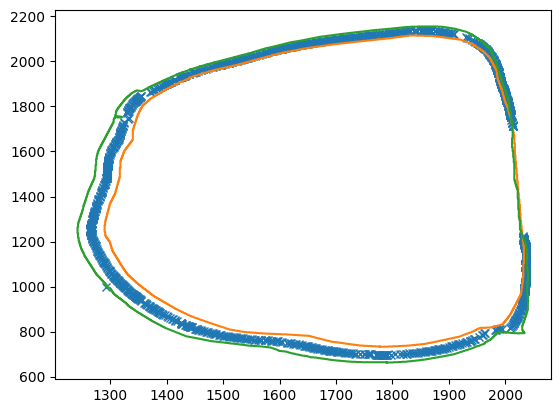

In [205]:
plt.plot(max_points[:,1],max_points[:,0],'x')
plt.plot(xy61[:,0],xy61[:,1])
plt.plot(xy74[:,0],xy74[:,1])

In [162]:
combined.max()

3.0

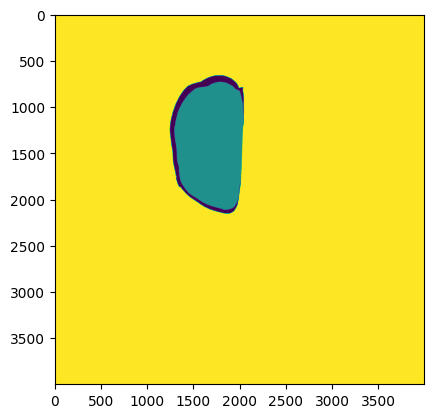

In [163]:
plt.imshow(combined)

In [164]:
kern = np.zeros((5,5))
kern[2,:]=1
kern[:,2]=1
kern/=kern.sum()

In [165]:
kern

array([[0.        , 0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ]])

In [166]:
import scipy
from tqdm import tqdm

In [167]:
for _ in tqdm(range(200)):
    combined = scipy.ndimage.convolve(combined,kern)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:38<00:00,  5.22it/s]


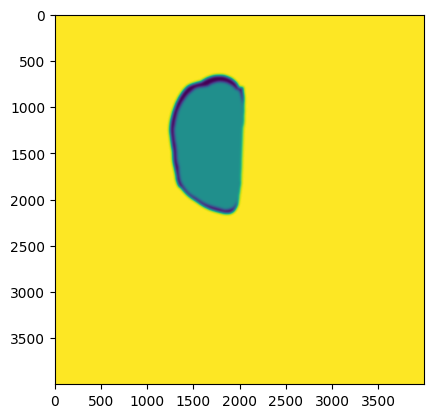

In [168]:
plt.imshow(combined)

In [169]:
X, Y = np.meshgrid(np.arange(0,4000),np.arange(0,4000))

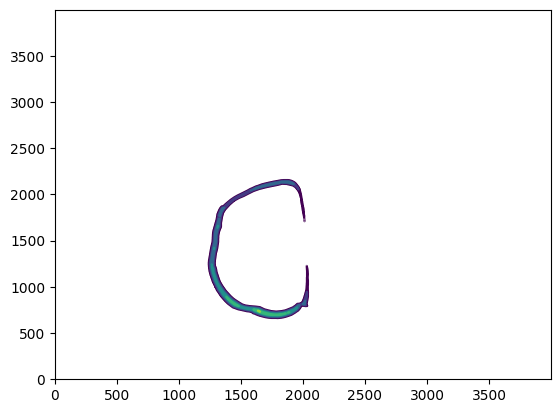

In [195]:
plt.contour(X,Y,distmap,levels=5) # 74-61+1)

In [196]:
from skimage.measure import find_contours

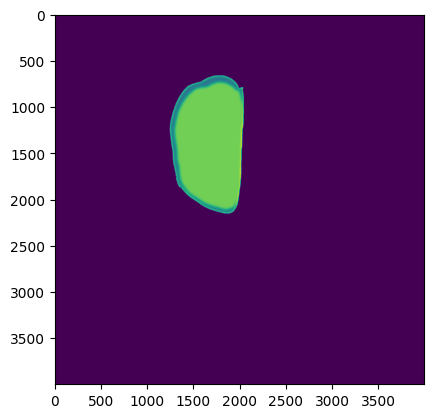

In [172]:
plt.imshow(combined*msk74)

In [173]:
np.min(combined)

1.010021358611553

In [174]:
1+1/13

1.0769230769230769

In [197]:
C = find_contours(distmap) #,1.8)

In [198]:
len(C)

29

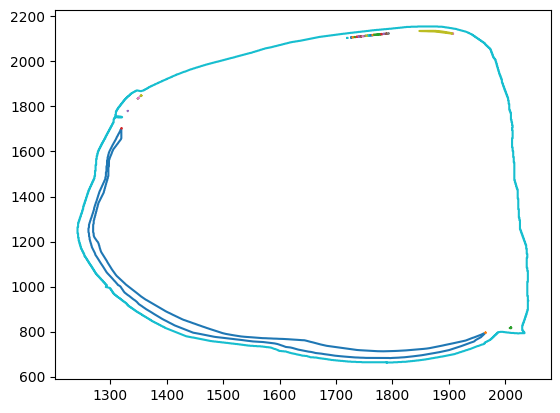

In [200]:
plt.ion()
for ii in range(len(C)):
    plt.plot(C[ii][:,1],C[ii][:,0],'-')
    
# plt.plot(xy61[:,0],xy61[:,1])
plt.plot(xy74[:,0],xy74[:,1])

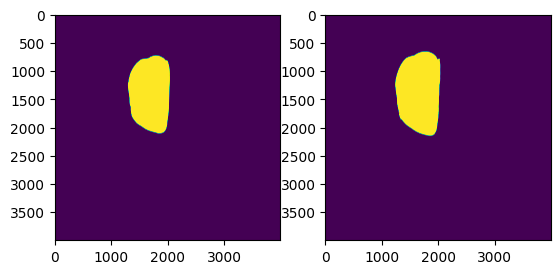

In [54]:
plt.subplot(1,2,1)
plt.imshow(msk61)

plt.subplot(1,2,2)
plt.imshow(msk74)

In [ ]:
shapes_61[15][0]

In [ ]:
nr

In [84]:
width = max((maxx-minx),(maxy-miny))
width

1492.0

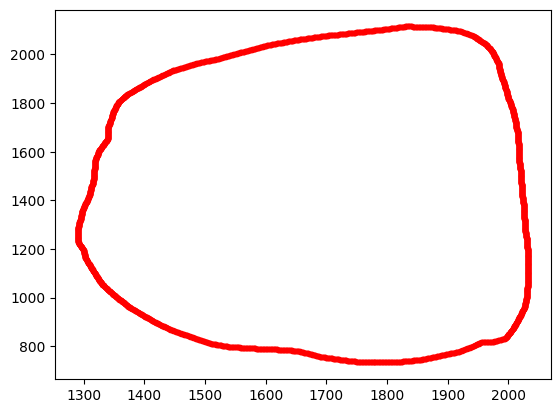

In [72]:
xy=shapes_61[15][0].exterior.xy
plt.plot(xy[0],xy[1],'r.')

In [73]:
# dir(shapes_61[15][0])